<a href="https://colab.research.google.com/github/nanda3-vit/HeartDiseasePractice/blob/main/SampleCodeforDistanceMeasure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HAMMING DISTANCE**

Hamming code is a set of error-correction codes that can be used to detect and correct the errors that can occur when the data is moved or stored from the sender to the receiver. It is a technique developed by R.W. Hamming for error correction.

---



***Sample Code for Hamming Distance Concept***

In [8]:
pip install hamming

  Created wheel for hamming: filename=hamming-0.0.4-cp37-none-any.whl size=3175 sha256=88e8f7d5137b9308db31de0fdb82398e41dc6d579e0fd2c9c8cb0db781c6e5f9
  Stored in directory: /root/.cache/pip/wheels/75/83/ed/096b4b55ec4eb8bd8f02d0c0fac61f2430221ac453890d9ef8
Successfully built hamming


In [18]:
# Python program to dmeonstrate 
# hamming code 
  
  
def calcRedundantBits(m): 
  
    # Use the formula 2 ^ r >= m + r + 1 
    # to calculate the no of redundant bits. 
    # Iterate over 0 .. m and return the value 
    # that satisfies the equation 
  
    for i in range(m): 
        if(2**i >= m + i + 1): 
            return i 
  
  
def posRedundantBits(data, r): 
  
    # Redundancy bits are placed at the positions 
    # which correspond to the power of 2. 
    j = 0
    k = 1
    m = len(data) 
    res = '' 
  
    # If position is power of 2 then insert '0' 
    # Else append the data 
    for i in range(1, m + r+1): 
        if(i == 2**j): 
            res = res + '0'
            j += 1
        else: 
            res = res + data[-1 * k] 
            k += 1
  
    # The result is reversed since positions are 
    # counted backwards. (m + r+1 ... 1) 
    return res[::-1] 
  
  
def calcParityBits(arr, r): 
    n = len(arr) 
  
    # For finding rth parity bit, iterate over 
    # 0 to r - 1 
    for i in range(r): 
        val = 0
        for j in range(1, n + 1): 
  
            # If position has 1 in ith significant 
            # position then Bitwise OR the array value 
            # to find parity bit value. 
            if(j & (2**i) == (2**i)): 
                val = val ^ int(arr[-1 * j]) 
                # -1 * j is given since array is reversed 
  
        # String Concatenation 
        # (0 to n - 2^r) + parity bit + (n - 2^r + 1 to n) 
        arr = arr[:n-(2**i)] + str(val) + arr[n-(2**i)+1:] 
    return arr 
  
  
def detectError(arr, nr): 
    n = len(arr) 
    res = 0
  
    # Calculate parity bits again 
    for i in range(nr): 
        val = 0
        for j in range(1, n + 1): 
            if(j & (2**i) == (2**i)): 
                val = val ^ int(arr[-1 * j]) 
  
        # Create a binary no by appending 
        # parity bits together. 
  
        res = res + val*(10**i) 
  
    # Convert binary to decimal 
    return int(str(res), 2) 
  
  
# Enter the data to be transmitted 
data = '1011001'
  
# Calculate the no of Redundant Bits Required 
m = len(data) 
r = calcRedundantBits(m) 
  
# Determine the positions of Redundant Bits 
arr = posRedundantBits(data, r) 
  
# Determine the parity bits 
arr = calcParityBits(arr, r) 
  
# Data to be transferred 
print("Data transferred is " + arr)   
  
# Stimulate error in transmission by changing 
# a bit value. 
# 10101001110 -> 11101001110, error in 10th position. 
  
arr = '11101001110'
print("Error Data is " + arr) 
correction = detectError(arr, r) 
print("The position of error is " + str(correction)) 

Data transferred is 10101001110
Error Data is 11101001110
The position of error is 10


**MANHATTAN DISTANCE**

Manhattan distance is a metric in which the distance between two points is calculated as the sum of the absolute differences of their Cartesian coordinates. In a simple way of saying it is the total sum of the difference between the x-coordinates and y-coordinates.

---






***Sample Code for Manhattan Distance Concept***

In [19]:
# Python3 code to find sum of 
# Manhattan distance between all 
# the pairs of given points
 
# Return the sum of distance 
# between all the pair of points.
def distancesum (x, y, n):
    sum = 0
     
    # for each point, finding distance
    # to rest of the point
    for i in range(n):
        for j in range(i+1,n):
            sum += (abs(x[i] - x[j]) +
                        abs(y[i] - y[j]))
     
    return sum
 
# Driven Code
x = [ -1, 1, 3, 2 ]
y = [ 5, 6, 5, 3 ]
n = len(x)
print(distancesum(x, y, n) )

22


**CLUSTERING**

# Clustering is a set of techniques used to partition data into groups, or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters.

**K-Means Clustering**

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. 

---



***Sample Code for K-Means Clustering Concept***

In [22]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('/content/sample_data/clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


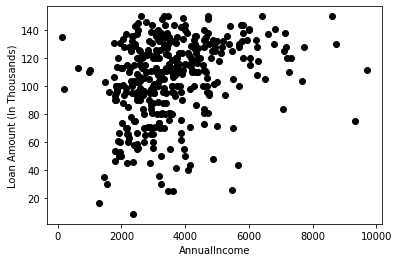

In [24]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

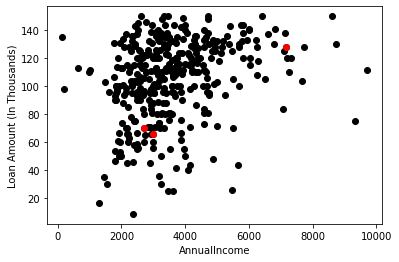

In [25]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [26]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


157.3540954963552
99.8005464658375
134.2385608031846
80.42253001270922
99.50821192263949
27.38200063816943
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


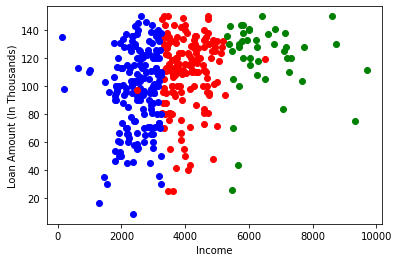

In [28]:
color=['red','green','blue']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()